Write a python script/function, that does global histogram equalization of an gray-scale image. The solution should consist of the following steps:

1. load image, convert to gray-scale if needed,
2. compute histogram using 256 bins,
3. compute relative cummulative histogram,
4. draw graphs of both histograms,
5. create enhanced image - replace the intensity of every pixel by corresponding value from cummulative histogram (i.e. the c.h. serves as an intensity lookup table),
6. compute histogram and cummulative histogram of the enhanced image,
7. show the enhanced image and its histograms.

Some tips:

1. Image intensities are floating point values in the range <0;1>; an intensity must be reasonably multiplied and converted to an integer value to serve as an index to an array, e.g. index = int( img[i,j] * 255 ) maps <0;1> to {0,1,...,255}.
2. h = np.zeros( (256) ) preallocates 1-D array (vector) with 256 elements all set to zero
3. len( img.shape ) returns the number of dimensions of the numpy array img; 3 for a colour image, 2 for a gray-scale one

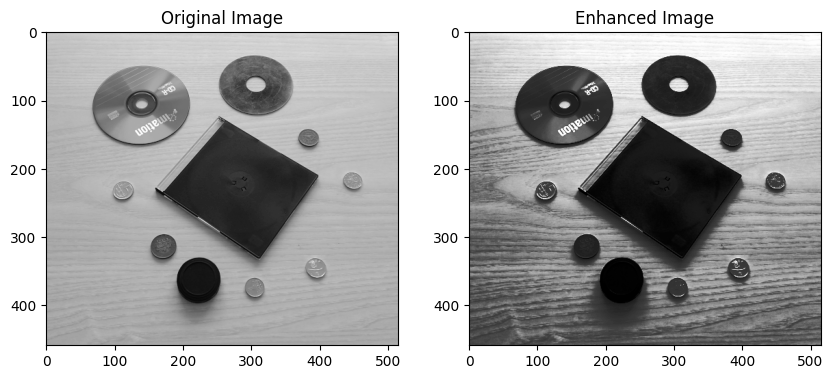

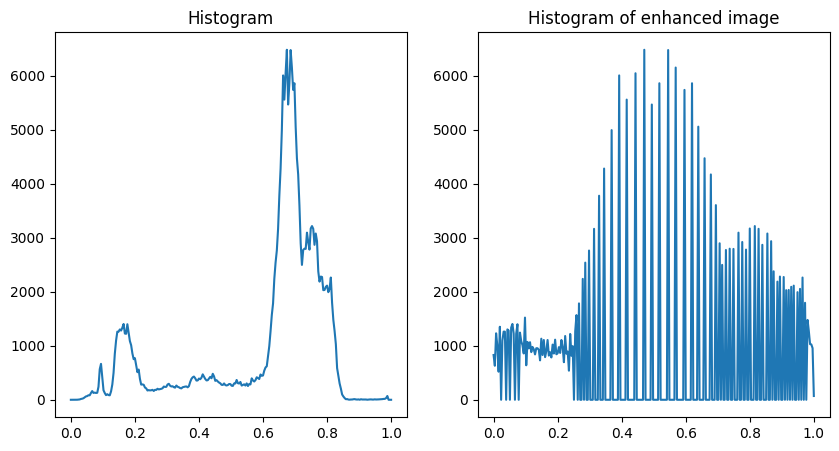

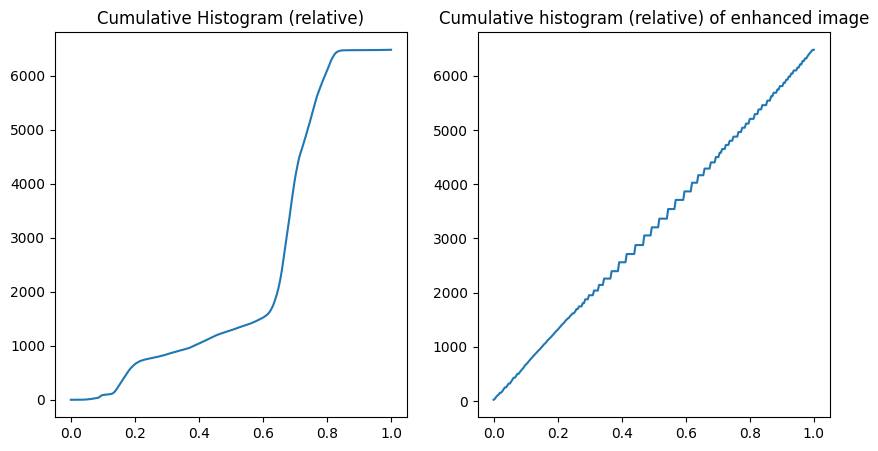

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_histogram_equalization(img):
    # Check if image is loaded
    if img is None:
        print("Error: Image not loaded.")
        return None, None, None, None, None, None

    # For histogram
    hist_original, bins_original = np.histogram(img.flatten(), 256, [0, 256])
    cdf_original = hist_original.cumsum()
    cdf_original_normalized = cdf_original * hist_original.max() / cdf_original.max()

    # Create the enhanced image using the CDF (histogram equalization)
    cdf_m = np.ma.masked_equal(cdf_original, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the CDF
    cdf_equalized = np.ma.filled(cdf_m, 0).astype('uint8')  # Remove the mask and cast back to uint8

    # CDF to the original image
    enhanced_img = cdf_equalized[img]

    # histogram and cumulative distribution for enhanced image
    hist_enhanced, bins_enhanced = np.histogram(enhanced_img.flatten(), 256, [0, 256])
    cdf_enhanced = hist_enhanced.cumsum()
    cdf_enhanced_normalized = cdf_enhanced * hist_enhanced.max() / cdf_enhanced.max()

    return img, enhanced_img, hist_original, cdf_original_normalized, hist_enhanced, cdf_enhanced_normalized

# Loading img in grayscale
image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
original_img, enhanced_img, hist_original, cdf_original, hist_enhanced, cdf_enhanced = global_histogram_equalization(image)

if original_img is not None and enhanced_img is not None:
    # original and enhanced img
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap="gray")
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_img, cmap="gray")
    plt.title("Enhanced Image")
    plt.show()

    # Normalize x-axis to be from 0.0 to 1.0
    bins_normalized = np.linspace(0, 1, len(hist_original))

    # Plotting for histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bins_normalized, hist_original, label="Original Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Histogram")

    plt.subplot(1, 2, 2)
    plt.plot(bins_normalized, hist_enhanced, label="Enhanced Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Histogram of enhanced image")
    plt.show()

    # cumulative histograms for original and enhanced img
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bins_normalized, cdf_original, label="Original Cumulative Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Cumulative Histogram (relative)")

    plt.subplot(1, 2, 2)
    plt.plot(bins_normalized, cdf_enhanced, label="Enhanced Cumulative Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Cumulative histogram (relative) of enhanced image")
    plt.show()

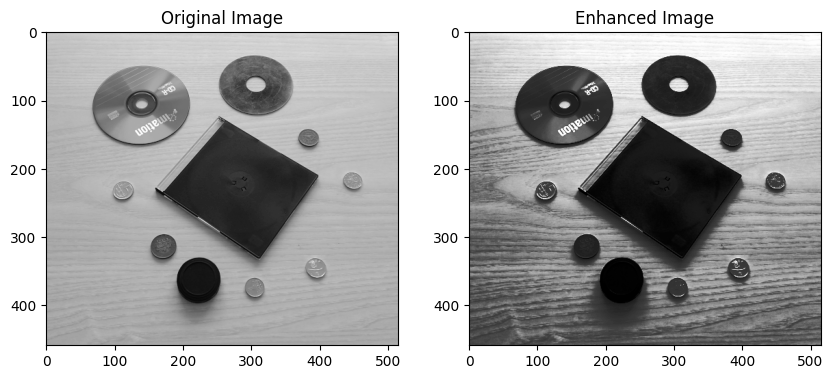

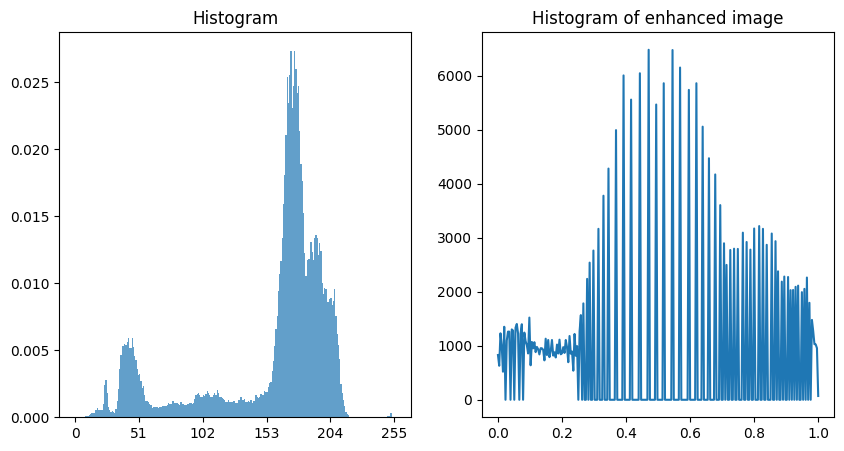

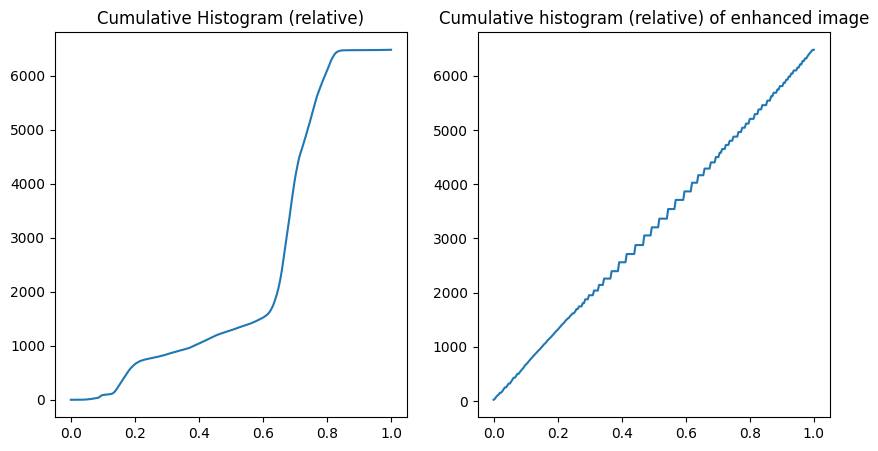

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_histogram_equalization(img):

    # Checking if image loaded or not
    if img is None:
        print("Error: Image not loaded.")
        return None, None, None, None, None, None

    # Compute the histogram
    hist_original, bins_original = np.histogram(img.flatten(), 256, [0, 256])
    cdf_original = hist_original.cumsum()
    cdf_original_normalized = cdf_original * hist_original.max() / cdf_original.max()

    # Compute the cumulative distribution function (CDF)
    # cdf = hist.cumsum()
    # cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize CDF for display purposes

    # Creating enhanced image using CDF (histogram equalization)
    cdf_m = np.ma.masked_equal(cdf_original, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the CDF
    cdf_equalized = np.ma.filled(cdf_m, 0).astype('uint8')  # Remove the mask and cast back to uint8

    # Applying CDF to original img
    enhanced_img = cdf_equalized[img]

    # Computing histogram & cumulative distribution for enhanced img
    hist_enhanced, bins_enhanced = np.histogram(enhanced_img.flatten(), 256, [0, 256])
    cdf_enhanced = hist_enhanced.cumsum()
    cdf_enhanced_normalized = cdf_enhanced * hist_enhanced.max() / cdf_enhanced.max()

    return img, enhanced_img, hist_original, cdf_original_normalized, hist_enhanced, cdf_enhanced_normalized

# Loading img in grayscale
image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Applying histogram equalization
original_img, enhanced_img, hist_original, cdf_original, hist_enhanced, cdf_enhanced = global_histogram_equalization(image)

if original_img is not None and enhanced_img is not None:
    # Displaying original and enhanced img
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap="gray")
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_img, cmap="gray")
    plt.title("Enhanced Image")
    plt.show()

    # Normalize x-axis to be from 0.0 to 1.0
    bins_normalized = np.linspace(0, 1, len(hist_original))

    # Plotting the histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(original_img.flatten(), bins=256, range=(0, 256), density=True, alpha=0.7)  # Histogram of original image
    # plt.plot(bins_normalized, hist_original, label="Original Histogram")
    plt.xticks(np.linspace(0, 1, 6)*255)  # X-axis : 0.0 to 1.0
    plt.title("Histogram")

    plt.subplot(1, 2, 2)
    plt.plot(bins_normalized, hist_enhanced, label="Enhanced Histogram")

    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Histogram of enhanced image")
    plt.show()

    # Plotting cumulative histograms for original & enhanced img
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bins_normalized, cdf_original, label="Original Cumulative Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Cumulative Histogram (relative)")

    plt.subplot(1, 2, 2)
    plt.plot(bins_normalized, cdf_enhanced, label="Enhanced Cumulative Histogram")
    plt.xticks(np.linspace(0, 1, 6))  # X-axis : 0.0 to 1.0
    plt.title("Cumulative histogram (relative) of enhanced image")
    plt.show()